В этом примере показано, как scikit-learn можно использовать для распознавания изображений рукописных цифр от 0 до 9.

In [1]:
# Стандартный научный импорт Python
import matplotlib.pyplot as plt

# Импорт наборов данных, классификаторов и показателей производительности
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# **Набор цифр**

Набор данных **digits** состоит из изображений цифр размером 8x8 пикселей. Атрибут images набора данных хранит массивы значений оттенков серого 8x8 для каждого изображения. Мы будем использовать эти массивы для визуализации первых 4 изображений. Атрибут target набора данных хранит цифру, которую представляет каждое изображение, и это включено в заголовок 4 графиков ниже.

**Примечание:** если бы мы работали с файлами изображений (например, с файлами «png»), мы бы загрузили их, используя файлы **matplotlib.pyplot.imread**.

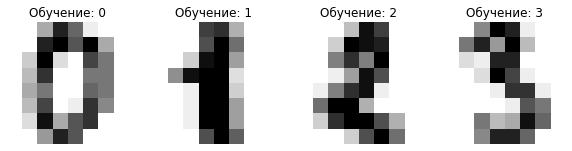

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Обучение: %i" % label)

# **Классификация**

Чтобы применить классификатор к этим данным, нам нужно сгладить изображения, превратив каждый двумерный массив значений оттенков серого из shape в shape . Впоследствии весь набор данных будет иметь форму , где — количество изображений, а — общее количество пикселей в каждом изображении.(8, 8)(64,)(n_samples, n_features)n_samplesn_features

Затем мы можем разделить данные на обучающие и тестовые подмножества и подобрать классификатор опорных векторов к выборкам поездов. Подогнанный классификатор впоследствии можно использовать для прогнозирования значения цифры для выборок в тестовом подмножестве.

In [21]:
# сгладить изображения
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Создайте классификатор: классификатор опорных векторов
clf = svm.SVC(gamma=0.001)

# Разделите данные на 50% обучающих и 50% тестовых подмножеств
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Изучите цифры в подмножестве поезда
clf.fit(X_train, y_train)

# Предсказать значение цифры в тестовом подмножестве
predicted = clf.predict(X_test)

Ниже мы визуализируем первые 4 тестовых образца и показываем их предсказанное числовое значение в заголовке.

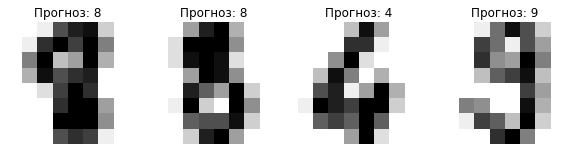

In [22]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Прогноз: {prediction}")

**classification_report** строит текстовый отчет, показывающий основные метрики классификации.

In [23]:
print(
    f"Отчет о классификации для классификатора {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Отчет о классификации для классификатора SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Мы также можем построить матрицу путаницы истинных значений цифр и предсказанных значений цифр.

Матрица путаницы:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


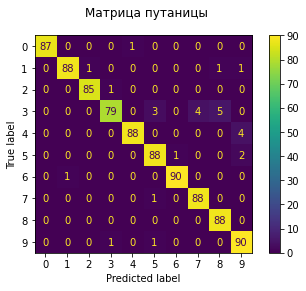

In [24]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Матрица путаницы")
print(f"Матрица путаницы:\n{disp.confusion_matrix}")

plt.show()

Если результаты оценки классификатора хранятся в виде матрицы путаницы , а не в терминах **y_true** и **y_pred**, можно построить  **classification_report** следующим образом:

In [25]:
# Основная правда и предсказанные списки
y_true = []
y_pred = []
cm = disp.confusion_matrix

# Для каждой ячейки в матрице путаницы добавьте соответствующие основные истины
# и прогнозы к спискам
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Отчет о классификации, восстановленный из-за путаницы matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Отчет о классификации, восстановленный из-за путаницы matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


